# Resource Assignment Problem formulation

Consider three job positions: Tester, Java-Developer, and Architect.

Consider three resources: Carlos, Joe, and Monika.

## Data 

The ability to perform each of the jobs by each of the resources is illustrated by the following matching scores table:

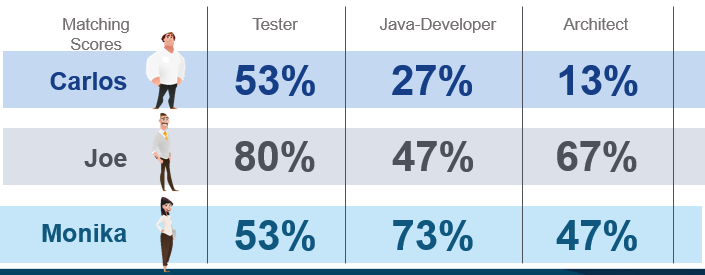


**Assumption**: Only one resource can be assigned to a job, and at most one job can be assigned to a resource.

## Problem statement

Determine an assignment that ensures that each job is fulfilled and each resource is assigned to at most one job in order to maximize the total matching scores of the assignments.

## Decision variables

The decision variable $x_{r,\; j} = 1$ represents that resource r is assigned to job j, and 0 otherwise, for  r=1,2,3 and 𝑗=1,2,3.

## Constraints

### Jobs constraints

For each job 𝑗=1,2,3, exactly one resource from r=1,2,3 must be assigned.

Constraint (Tester=1): $x_{1,\; 1} + x_{2,\; 1} + x_{3,\; 1} = 1$

Constraint (Java-Developer=2): $x_{1,\; 2} + x_{2,\; 2} + x_{3,\; 2} = 1$

Constraint (Architect=3): $x_{1,\; 3} + x_{2,\; 3} + x_{3,\; 3} = 1$

### Resources constraints

For each resource = r=1,2,3, at most one job from r=1,2,3 can be assigned.

Constraint (Carlos=1): $x_{1,\; 1} + x_{1,\; 2} + x_{1,\; 3}  \leq 1$

Constraint (Joe=2): $x_{2,\; 1} + x_{2,\; 2} + x_{2,\; 3}  \leq 1$

Constraint (Monika=3): $x_{2,\; 1} + x_{2,\; 2} + x_{2,\; 3}  \leq 1$

## Objective function

The objective function is to maximize the total matching score of the assignments while satisfying the jobs and resources constraints.

$$
Max \; (53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1}) + (27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2})
+ (13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3})
$$




First, let's install gurobipy as needed

In [ ]:
%pip install gurobipy

In [2]:
# import gurobi library
from gurobipy import *

## Data
The list R contains the names of the three resources: Carlos, Joe, and Monika. 

The list J contains the names of the job positions: tester, java-developer, and architect

In [3]:
# resources and jobs sets
R = ['Carlos', 'Joe', 'Monika']
J = ['Tester', 'JavaDeveloper', 'Architect']

$r \in R$ index and set of resources.

$j \in J$ index and set of Jobs.

The following “multidict” function describes the matching score associated with each possible combination of a resource and job

In [4]:
# matching score data
combinations, ms = multidict({
    ('Carlos', 'Tester'): 53,
    ('Carlos', 'JavaDeveloper'): 27,
    ('Carlos', 'Architect'): 13,
    ('Joe', 'Tester'): 80,
    ('Joe', 'JavaDeveloper'): 47,
    ('Joe', 'Architect'): 67,
    ('Monika', 'Tester'): 53,
    ('Monika', 'JavaDeveloper'): 73,
    ('Monika', 'Architect'): 47
})

The following function generates an empty model object “m” and takes the string “RAP” model name as its argument.

In [5]:
# Declare and initialize model
m = Model('RAP')

## Decision variables

The decision variable $x_{r,\; j} = 1$ represents that resource r is assigned to job j, and 0 otherwise, for $r \in R$ and $j \in J $.

The “addVars()” method defines the decision variables of the model object “m”.  

In [6]:
# Create decision variables for the RAP model
x = m.addVars(combinations, name="assign")

## Job constraints

For each job 𝑗=1,2,3, exactly one resource from r=1,2,3 must be assigned.

Constraint (Tester=1): $x_{1,\; 1} + x_{2,\; 1} + x_{3,\; 1} = 1$

Constraint (Java-Developer=2): $x_{1,\; 2} + x_{2,\; 2} + x_{3,\; 2} = 1$

Constraint (Architect=3): $x_{1,\; 3} + x_{2,\; 3} + x_{3,\; 3} = 1$

The “addConstrs()” method defines the constraints of the model object “m”. 


In [7]:
# create jobs  constraints
job = m.addConstrs((x.sum('*',j) == 1 for j in J), 'job')

## Job constraints
$$
\sum_{r \: \in \: R} x_{r,\; j} = 1 \; \; \; \forall \; j \in J
$$

## Resource constraints

For each resource = r=1,2,3, at most one job from r=1,2,3 can be assigned.

Constraint (Carlos=1): $x_{1,\; 1} + x_{1,\; 2} + x_{1,\; 3}  \leq 1$

Constraint (Joe=2): $x_{2,\; 1} + x_{2,\; 2} + x_{2,\; 3}  \leq 1$

Constraint (Monika=3): $x_{3,\; 1} + x_{3,\; 2} + x_{3,\; 3}  \leq 1$

The “addConstrs()” method defines the constraints of the model object “m”. 

In [8]:
# create resources constraints
resource = m.addConstrs((x.sum(r,'*') <= 1 for r in R), 'resource')

## Resource constraints
$$
\sum_{j \: \in \: J} x_{r,\; j} \leq 1 \; \; \; \forall \; r \in R
$$

## Objective Function

The objective function is to maximize the total matching score of the assignments.

$$
Max \; (53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1}) + (27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2})
+ (13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3})
$$

The “setObjective()” method defines the objective function of the model object “m”. 

In [9]:
# The objective is to maximize total matching score of the assignments
m.setObjective(x.prod(ms), GRB.MAXIMIZE)

## Objective function
Notice that 
$$
(53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1}) = \sum_{r \; \in \; R} ms_{r,1}x_{r,1} \\
(27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2}) = \sum_{r \; \in \; R} ms_{r,2}x_{r,2} \\
(13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3})  = \sum_{r \; \in \; R} ms_{r,3}x_{r,3}
$$

Hence, the objective function can be expressed as follows

$$
Max \; \sum_{j \; \in \; J} \sum_{r \; \in \; R} ms_{r,j}x_{r,j}
$$

In [10]:
# save model for inspection
m.write('RAP.lp')

In [11]:
# run optimization engine
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 9 columns and 18 nonzeros
Model fingerprint: 0xb343b6eb
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 18 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.6000000e+32   1.800000e+31   4.600000e+02      0s
       5    1.9300000e+02   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.930000000e+02


In [12]:
def print_solution(model):
    for var in model.getVars():
        if abs(var.x) > 1e-6:
            print("{0}: {1}".format(var.varName, var.x))
    print('Total matching score: {0}'.format(model.objVal))
    return None

# display optimal values of decision variables
print_solution(m)   


assign[Carlos,Tester]: 1.0
assign[Joe,Architect]: 1.0
assign[Monika,JavaDeveloper]: 1.0
Total matching score: 193.0


## New scenario
Consider a new resource by the name of Ada that has a matching score of 100% for all the job positions.

## Constraints

### Jobs constraints

For each job 𝑗=1,2,3, exactly one resource from r=1,2,3,4 must be assigned.

Constraint (Tester=1): $x_{1,\; 1} + x_{2,\; 1} + x_{3,\; 1} + x_{4,\; 1} = 1$

Constraint (Java-Developer=2): $x_{1,\; 2} + x_{2,\; 2} + x_{3,\; 2} + x_{4,\; 2} = 1$

Constraint (Architect=3): $x_{1,\; 3} + x_{2,\; 3} + x_{3,\; 3} + x_{4,\; 3}= 1$

### Resources constraints

For each resource r=4, at most one job from r=1,2,3 can be assigned.

Constraint (Ada=1): $x_{4,\; 1} + x_{4,\; 2} + x_{4,\; 3}  \leq 1$


## Objective function

The objective function is to maximize the total matching score of the assignments while satisfying the jobs and resources constraints.

$$
Max \; (53x_{1,\; 1} + 80x_{2,\; 1} + 53x_{3,\; 1} + 100x_{4, \; 1}) 
+ (27x_{1,\; 2} + 47x_{2,\; 2} + 73x_{3,\; 2} + 100x_{4, \; 2})
+ (13x_{1,\; 3} + 67x_{2,\; 3} + 47x_{3,\; 3} + 100x_{4, \; 3})
$$


In [13]:
new_scores = {('Ada','Tester'):100, ('Ada','JavaDeveloper'):100, ('Ada','Architect'):100}

for key, val in new_scores.items():
    r, j = key
    x[key] = m.addVar(obj=val,
                           name='assign[{0},{1}]'.format(r,j),
                           column=Column([1], [m.getConstrByName('job[{0}]'.format(j))]))
m.addConstr(x.sum('Ada','*') <= 1, name="resources[Ada]")

<gurobi.Constr *Awaiting Model Update*>

In [14]:
# reoptimize
m.optimize()
# display optimal values of decision variables
print_solution(m)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 12 columns and 24 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4100000e+32   9.000000e+30   1.410000e+02      0s
       2    2.5300000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.530000000e+02
assign[Joe,Tester]: 1.0
assign[Monika,JavaDeveloper]: 1.0
assign[Ada,Architect]: 1.0
Total matching score: 253.0
